In [1]:
import numpy as np
import h5py
from matplotlib import pyplot as plt
import glob
import re

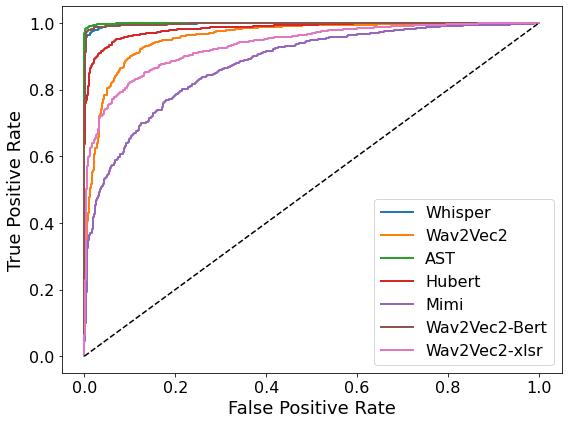

In [2]:
import h5py
import matplotlib.pyplot as plt

# Path to the HDF5 file with ROC data
roc_file_Whisper = "logs/validation_roc_whisper.hdf5"
roc_file_Wav2Vec2 = "logs/validation_roc_wav2vec2.hdf5"
roc_file_AST = "logs/validation_roc_ast.hdf5"
roc_file_Hubert = "logs/validation_roc_hubert.hdf5"
roc_file_Mimi = "logs/validation_roc_mimi.hdf5"
roc_file_Wav2Vec2_bert = "logs/validation_roc_wav2vec2-bert.hdf5"
roc_file_Wav2Vec2_xlsr = "logs/validation_roc_wav2vec2-xlsr.hdf5"

plt.figure(figsize=(8, 6))

with h5py.File(roc_file_Whisper, "r") as f:
    fpr = f["fpr"][:]
    tpr = f["tpr"][:]
    plt.plot(fpr, tpr, lw=2, label="Whisper")

with h5py.File(roc_file_Wav2Vec2, "r") as f:
    fpr = f["fpr"][:]
    tpr = f["tpr"][:]
    plt.plot(fpr, tpr, lw=2, label="Wav2Vec2")

with h5py.File(roc_file_AST, "r") as f:
    fpr = f["fpr"][:]
    tpr = f["tpr"][:]
    plt.plot(fpr, tpr, lw=2, label="AST")

with h5py.File(roc_file_Hubert, "r") as f:
    fpr = f["fpr"][:]
    tpr = f["tpr"][:]
    plt.plot(fpr, tpr, lw=2, label="Hubert")

with h5py.File(roc_file_Mimi, "r") as f:
    fpr = f["fpr"][:]
    tpr = f["tpr"][:]
    plt.plot(fpr, tpr, lw=2, label="Mimi")

with h5py.File(roc_file_Wav2Vec2_bert, "r") as f:
    fpr = f["fpr"][:]
    tpr = f["tpr"][:]
    plt.plot(fpr, tpr, lw=2, label="Wav2Vec2-Bert")

with h5py.File(roc_file_Wav2Vec2_xlsr, "r") as f:
    fpr = f["fpr"][:]
    tpr = f["tpr"][:]
    plt.plot(fpr, tpr, lw=2, label="Wav2Vec2-xlsr")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate", fontsize=18)
plt.ylabel("True Positive Rate", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc="lower right", fontsize=16)
# plt.xscale("log")
# plt.yscale("log")
plt.tight_layout()  # Removes extra whitespace around the plot
# plt.savefig('ROC_curve_comparison.png', bbox_inches='tight', facecolor='w', transparent=False, dpi=400)
plt.show()


In [8]:
def plotter(path, title):
    paths = sorted(glob.glob(path), key=lambda x: int(re.search(r'_(\d+)\.hdf5$', x).group(1)))
    bounds = [int(f.split('_')[-2]) for f in paths]
    low_bounds = [20] + bounds[:-1]
    labels = [f"Mass Range: {low}-{high} $M_\odot$" for low, high in zip(low_bounds, bounds)]
    
    plt.figure(figsize=(8, 6))
    for i, path in enumerate(paths):
        snr = path.split("_")[-1].split(".")[0]
        with h5py.File(path, "r") as f:
            fpr_Whisper = f["fpr"][:]
            tpr_Whisper = f["tpr"][:]
            thresholds_Whisper = f["thresholds"][:]  # Optional, if needed for further analysis
        plt.plot(fpr_Whisper, tpr_Whisper, lw=2, label=labels[i])
    
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate", fontsize=18)
    plt.ylabel("True Positive Rate", fontsize=18)
    # plt.xscale("log")
    # plt.yscale("log")
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(loc="lower right", fontsize=16)
    plt.tight_layout()  # Removes extra whitespace around the plot
    plt.title(title, fontsize=16)
    # plt.savefig('600_800_log_ROC_curve_snr_comparison.png', bbox_inches='tight', facecolor='w', transparent=False, dpi=400)
    plt.show()

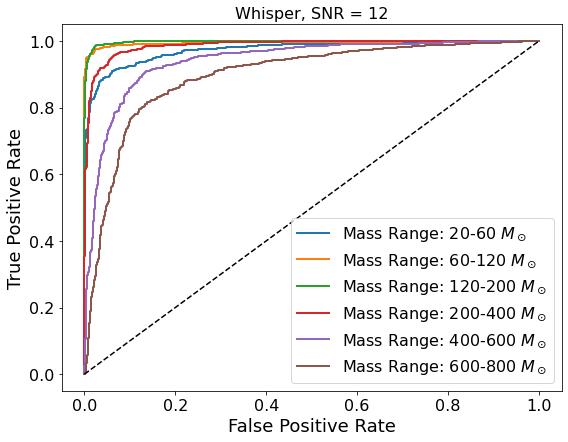

In [10]:
plotter("logs/whisper*eval_roc_*.hdf5", "Whisper, SNR = 12")

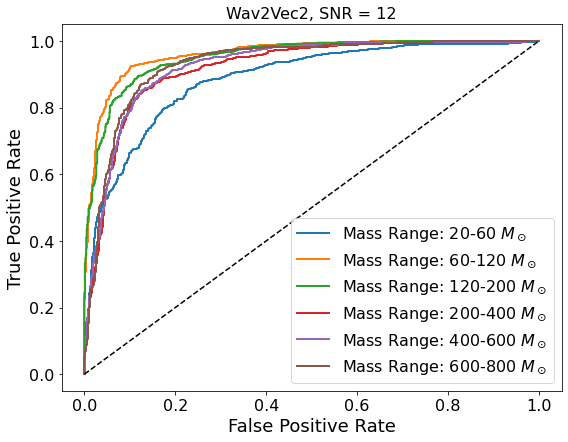

In [13]:
plotter("logs/wav2vec2_*eval_roc_*.hdf5", "Wav2Vec2, SNR = 12")

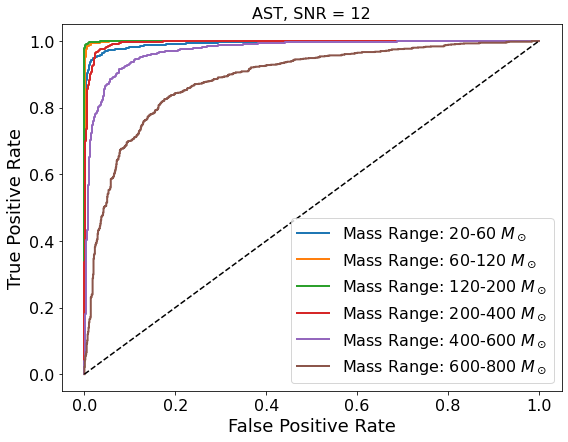

In [14]:
plotter("logs/ast*eval_roc_*.hdf5", "AST, SNR = 12")

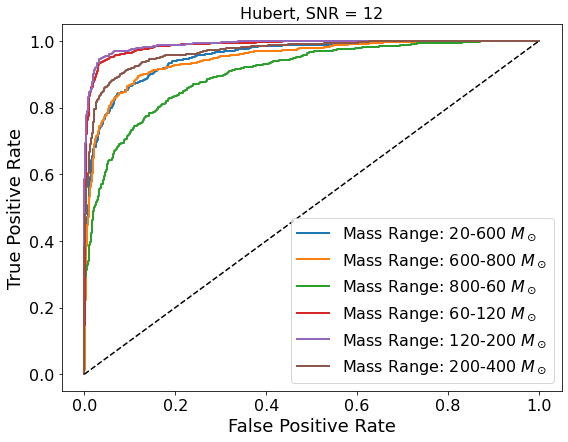

In [15]:
plotter("logs/hubert*eval_roc_*.hdf5", "Hubert, SNR = 12")

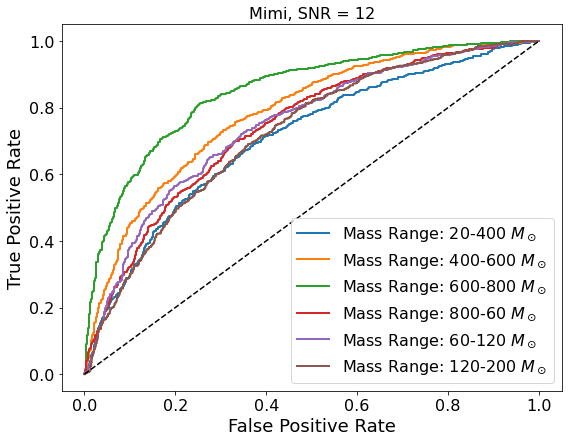

In [16]:
plotter("logs/mimi*eval_roc_*.hdf5", "Mimi, SNR = 12")

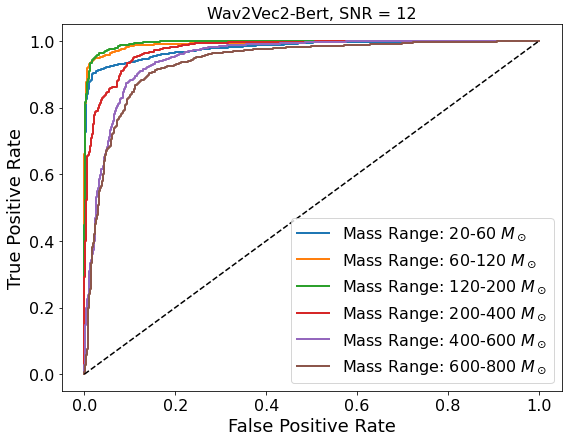

In [17]:
plotter("logs/*-bert*eval_roc_*.hdf5", "Wav2Vec2-Bert, SNR = 12")

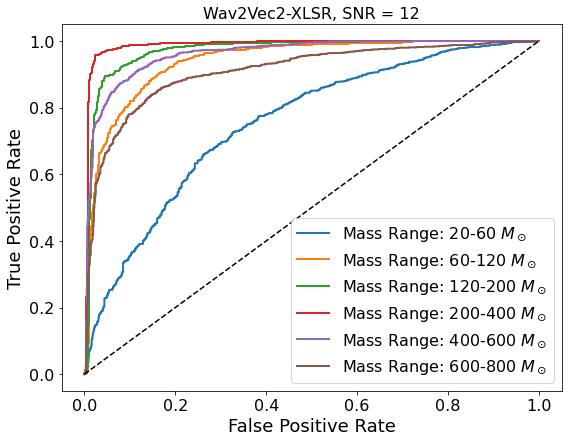

In [18]:
plotter("logs/*-xlsr*eval_roc_*.hdf5", "Wav2Vec2-XLSR, SNR = 12")

In [34]:
def plotter_2(path, title):
    paths = sorted(glob.glob(path), key=lambda x: int(re.search(r'_(\d+)\.hdf5$', x).group(1)))
    bounds = [int(f.split('_')[-2]) for f in paths]
    low_bounds = [20] + bounds[:-1]
    labels = [f"Mass Range: {low}-{high} $M_\odot$" for low, high in zip(low_bounds, bounds)]
    
    plt.figure(figsize=(8, 6))
    for i, path in enumerate(paths):
        model = path.split("_")[0].split("/")[1]
        with h5py.File(path, "r") as f:
            fpr_AST = f["fpr"][:]
            tpr_AST = f["tpr"][:]
            thresholds_AST = f["thresholds"][:]  # Optional, if needed for further analysis
        plt.plot(fpr_AST, tpr_AST, lw=2, label=model)
    
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate", fontsize=18)
    plt.ylabel("True Positive Rate", fontsize=18)
    # plt.xscale("log")
    # plt.yscale("log")
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(loc="lower right", fontsize=16)
    plt.tight_layout()  # Removes extra whitespace around the plot
    plt.title(title, fontsize=16)
    # plt.savefig('600_800_log_ROC_curve_snr_comparison.png', bbox_inches='tight', facecolor='w', transparent=False, dpi=400)
    plt.show()

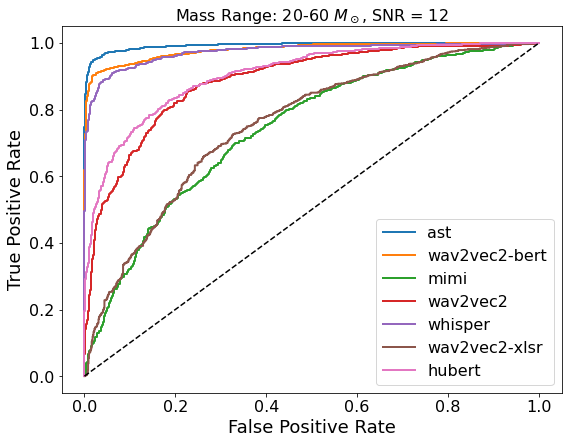

In [35]:
plotter_2("logs/*eval_roc_60_*.hdf5", f"Mass Range: 20-60 $M_\odot$, SNR = 12")

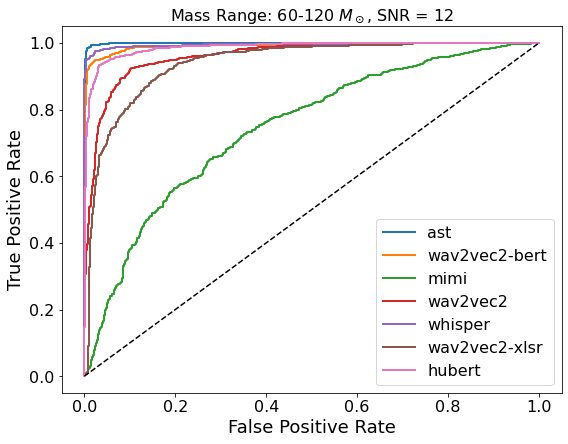

In [36]:
plotter_2("logs/*eval_roc_120_*.hdf5", f"Mass Range: 60-120 $M_\odot$, SNR = 12")

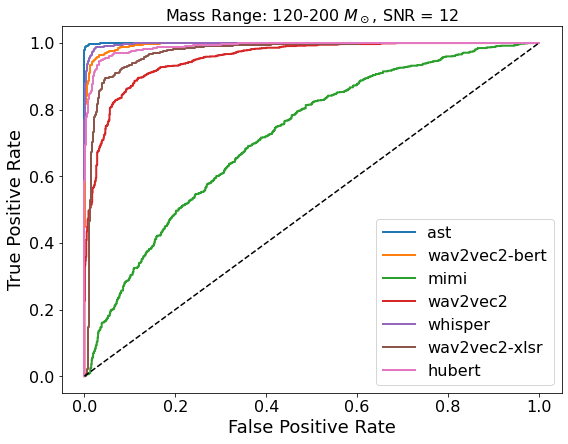

In [37]:
plotter_2("logs/*eval_roc_200_*.hdf5", f"Mass Range: 120-200 $M_\odot$, SNR = 12")

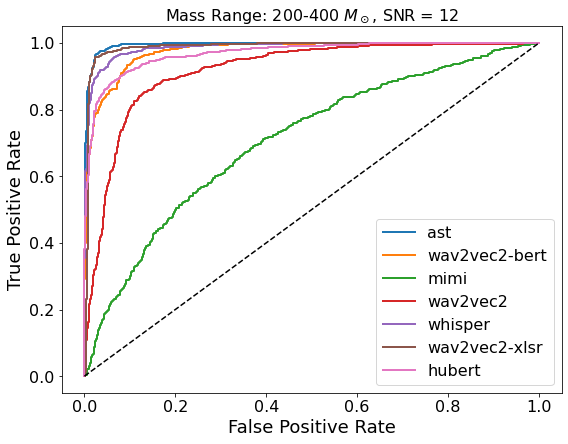

In [38]:
plotter_2("logs/*eval_roc_400_*.hdf5", f"Mass Range: 200-400 $M_\odot$, SNR = 12")

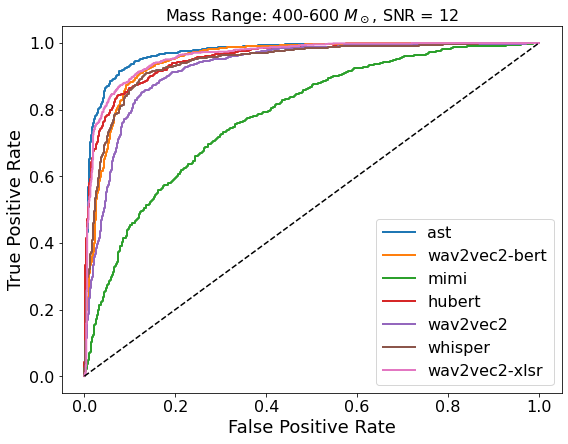

In [39]:
plotter_2("logs/*eval_roc_600_*.hdf5", f"Mass Range: 400-600 $M_\odot$, SNR = 12")

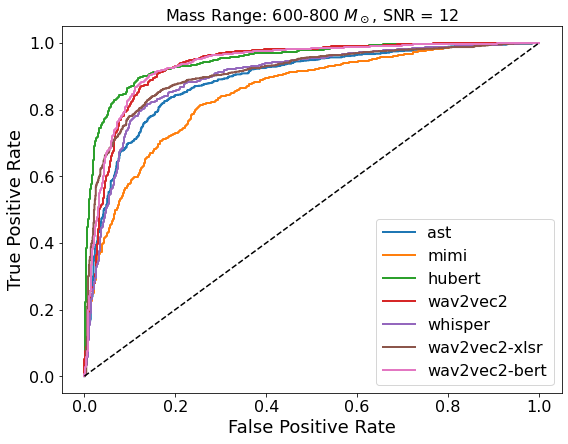

In [40]:
plotter_2("logs/*eval_roc_800_*.hdf5", f"Mass Range: 600-800 $M_\odot$, SNR = 12")